# Are houses in college towns more recession proof?
#### Mo Ghahramani

I use this notebook to calculate the average total return on houses, meaning price of the house + rental value.

To estimate the average total return on houses, I add the median rental value of houses to the median price of houses for each city for every quarter and calculate the average total return over any time period I want.

Data:
* From [Zillow research data site,](http://www.zillow.com/research/data/) all homes prices at a city level
* From [Zillow research data site,](http://www.zillow.com/research/data/) all homes rental values at a city level

In [1]:
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

## Helper functions & data cleaning

In [2]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [3]:
def convert_housing_price_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe.
    '''
    data = pd.read_csv('data/City_Zhvi_AllHomes_recent.csv', encoding='latin-1')
    data.drop(data.columns[[0,3,4,5]], axis=1, inplace=True)
    data.drop(data.columns[2:158], axis=1, inplace=True)
    data.State = data.State.map(states)
    data.set_index(['State', 'RegionName'], inplace=True)
    df = data.groupby(pd.PeriodIndex(data.columns, freq='Q'), axis=1).mean()
    return df.sort_index()
#convert_housing_price_to_quarters().head()

In [4]:
def convert_housing_rent_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe.
    '''
    data = pd.read_csv('data/City_Zri_AllHomes_recent_rent.csv', encoding='latin-1')
    data.drop(data.columns[[0,3,4,5]], axis=1, inplace=True)
#     data.drop(data.columns[2:47], axis=1, inplace=True)
    data.State = data.State.map(states)
    data.set_index(['State', 'RegionName'], inplace=True)
    df = data.groupby(pd.PeriodIndex(data.columns, freq='Q'), axis=1).sum()
    # filling in missing quarters with oldest available quarter
    for a in pd.PeriodIndex(year=[2009,2009,2009,2010,2010,2010], quarter=[2,3,4,1,2,3]):
        df[a] = df['2010Q4']
    return df.sort_index()
#convert_housing_rent_to_quarters()

In [5]:
# Merging Rent & Price dataframes on State/City index
df = (pd.merge(convert_housing_price_to_quarters().dropna(), 
               convert_housing_rent_to_quarters().dropna(), 
               how='inner', left_index=True, right_index=True))
df = df.groupby(lambda x: x.split('_')[0], axis=1).sum()
df.columns = pd.period_range(start='2009Q2', end='2018Q4', freq='Q')

In [6]:
#df.describe()

Total return on houses from 2009Q2-2018Q4 is 24.572142869434 %


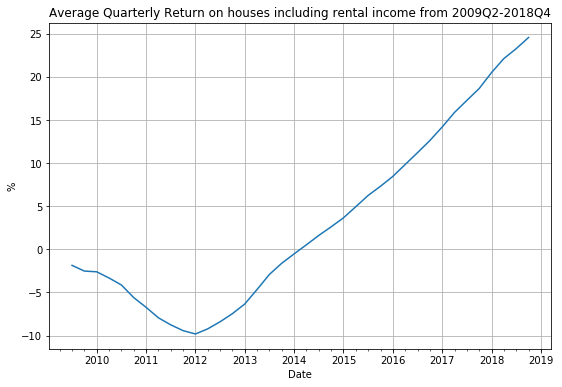

In [7]:
# plotting the results
hpr_plot = ((df.mean().pct_change().cumsum()*100)
            .plot(figsize=[9,6],
            title = 'Average Quarterly Return on houses including rental income from 2009Q2-2018Q4',
            grid = True) )
hpr_plot.set_xlabel('Date')
hpr_plot.set_ylabel('%')
print ('Total return on houses from 2009Q2-2018Q4 is',(df.mean().pct_change().cumsum().dropna()*100).max(),'%')